In [50]:
import numpy as np; np.random.seed(4)
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib import cm

In [53]:
# vet ikke hvorfor jeg ikke brukte data-generering fra sklearn
def generate_data(sample_size:int)->tuple:
    # Parameters for mean distributions
    mean_blue = [1, 0]
    mean_orange = [0, 1]
    mean_cov = np.eye(2)
    mean_size = 10
    
    # Additional parameters for blue and orange distributions
    sample_cov = np.eye(2)/5
    
    # Generate mean components for blue and orange (10 means for each)
    sample_blue_mean = np.random.multivariate_normal(mean_blue, mean_cov, mean_size)
    sample_orange_mean = np.random.multivariate_normal(mean_orange, mean_cov, mean_size)
    
    # generate blue points. vanskelig å bruke vektor siden det er to steg. kunne gjort loop, men tar generator
    # bruker random index
    sample_blue = np.array([
        np.random.multivariate_normal(sample_blue_mean[np.random.randint(0,9)], sample_cov)
        for _ in range(sample_size)
    ])
    # har nå laget x verdiene og deretter kobler jeg på y-verdier
    sample_orange = np.array([
        np.random.multivariate_normal(sample_orange_mean[np.random.randint(0, 9)],
                                      sample_cov)
        for _ in range(sample_size)
    ])
    y_blue = np.zeros(sample_size)
    y_orange = np.ones(sample_size)
    y = np.r_[y_blue,y_orange]
    X = np.r_[sample_blue, sample_orange]
    return X,y

In [54]:
sample_size = 100
X,y = generate_data(sample_size)
sample_blue = X[y == 0]
sample_orange = X[y == 1]

In [55]:
class LinearRegression():
    '''
    Skal ha  fit og predict
    '''
    def fit(self,X,y):
        ''' skal ikke returnere noe, men oppdatere tilstanden til estimatoren
        '''
        X = np.c_[np.ones(len(X)),X]
        self.beta = inv(X.T@X)@X.T@y
        return self
    
    def predict(self,x):
        return self.beta@np.r_[1,x]
    

In [56]:
class Knn_clf():
    'tror ikke den har noe fit...'
    def __init__(self, k, treshold = 0.5):
        self.k = k
        self.treshold = treshold
        self.type = 'knn'
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        return self
    
    def predict(self,x):
        X = self.X
        y = self.y
        k = self.k
        distances = ((X-x)**2).sum(axis=1)
        return int(np.mean(y[distances.argpartition(k)[:k]]) >= self.treshold)
    
    def predict_proba(self,x):
        X = self.X
        y = self.y
        k = self.k
        distances = ((X-x)**2).sum(axis=1)
        return np.mean(y[distances.argpartition(k)[:k]]) >= self.treshold


In [57]:
class Knn_reg():
    'tror ikke den har noe fit...'
    def __init__(self, k):
        self.k = k
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        return self
    
    def predict(self,x):
        X = self.X
        y = self.y
        k = self.k
        distances = ((X-x)**2)
        return np.mean(y[distances.argpartition(k)[:k]])


In [58]:
def decision_boundary(X,y,estimator,ax):
    estimator = estimator.fit(X,y)
    m = 100
    x0,x1 = X[:,0], X[:,1]
    min_x0, max_x0 = min(x0)-.5,max(x0)+.5
    min_x1, max_x1 = min(x1)-.5,max(x1)+.5
    x0_grid = np.linspace(min_x0,max_x0,m)
    x1_grid = np.linspace(min_x1,max_x1,m)
    xx0,xx1 = np.meshgrid(x0_grid,x1_grid)
    y_pred_grid = np.empty(m*m)
    for i in range(m*m):
        x_val = np.c_[xx0.flatten()[i],xx1.flatten()[i]]
        y_pred_grid[i] = estimator.predict(x_val)
    yy = y_pred_grid.reshape((m,m))
    ax.contourf(xx0,xx1,yy,alpha=0.8,cmap=cm.RdBu)
    ax.scatter(x0,x1,c=y,alpha=0.8,cmap=cm.RdBu,s=80)
    if estimator.type == 'knn':
        ax.title.set_text(f'knn med k={estimator.k}')
    return ax

In [59]:
def reg_plot(X,y,estimator,ax):
    estimator.fit(X,y)
    m = 200
    x_grid = np.linspace(min(X)-.5,max(X)+.5,m)
    y_pred = np.empty(m)
    for i in range(m):
        y_pred[i] = estimator.predict(x_grid[i])
    ax.scatter(X,y)
    ax.plot(x_grid,y_pred)
    ax.title.set_text(f'knn med k={estimator.k}')
    return ax

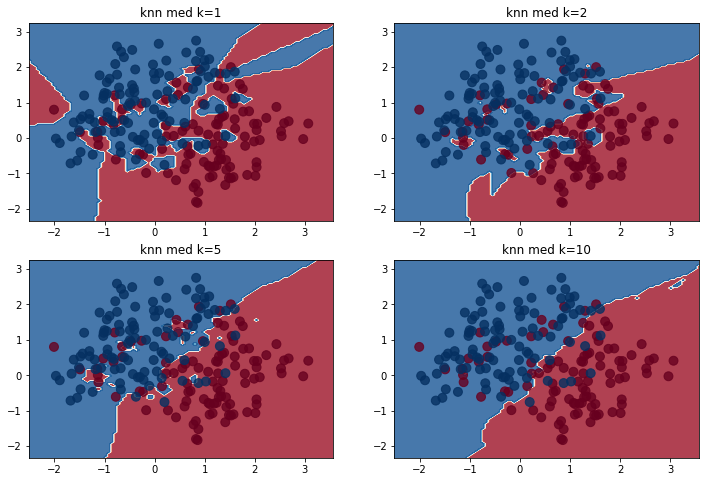

In [60]:
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.flatten()

k = (1,2,5,10)
for i,ax in enumerate(axes):
    ax = decision_boundary(X,y,Knn_clf(k[i]),ax)
plt.show()
fig.savefig('knn_clf.pdf')

In [67]:
def reg_plot(X,y,estimator,ax):
    estimator.fit(X,y)
    m = 200
    x_grid = np.linspace(min(X)-.5,max(X)+.5,m)
    y_pred = np.empty(m)
    for i in range(m):
        y_pred[i] = estimator.predict(x_grid[i])
    ax.scatter(X,y)
    ax.plot(x_grid,y_pred, linewidth=2)
    ax.plot(x_grid,np.cos(x_grid),color='black', linewidth=2)
    ax.title.set_text(f'knn med k={estimator.k}')
    return ax

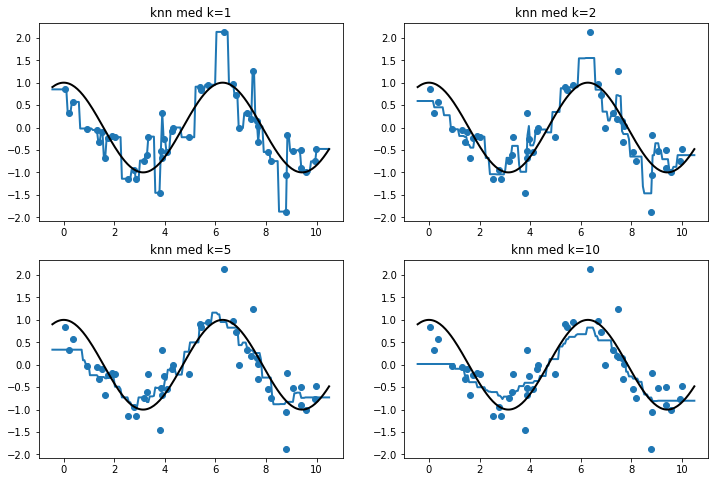

In [68]:
n = 50
X = np.random.uniform(0,10,size=n)
y = np.cos(X)+0.5*np.random.normal(size=n)

fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.flatten()

k = (1,2,5,10)
for i,ax in enumerate(axes):
    ax = reg_plot(X,y,Knn_reg(k[i]),ax)
fig.savefig('knn_reg.pdf')

todo:

visualisere bias variance tradeoff..